$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
# 1-D, 3-Site Hubbard Model

The Hubbard Hamiltonian for a 1-D chain of sites is:

\begin{equation} H = -t\sum_{<ij>,\sigma}(\hat{c}_{i_\sigma}\hat{c}_{j_\sigma} + \hat{c}_{j_\sigma}^\dagger\hat{c}_{i_\sigma} ) + U\sum_i\hat{c}_{i_\uparrow}^{\dagger}\hat{c}_{i_\uparrow}\hat{c}_{i_\downarrow}^{\dagger}\hat{c}_{i_\downarrow}
\end{equation}
and under the Jordan-Wigner mapping, this Hamiltonian becomes:

\begin{equation}
H = -\frac{t}{2}\sum_{<ij>}Z_{i+1:j-1}(X_{i}X_{j} + Y_{i}Y_{j}) + \frac{U}{4}\sum_{ij}(I-Z_{i})(I-Z_{j})
\end{equation}
where $Z_{i}$, $X_{i}$, and $Y_{i}$ are the corresponding Pauli matrices acting on the $i^{th}$ fermionic mode and for a chain with only 3-sites, there are no Pauli $Z$ strings in the hopping term of the Hamiltonian.

## 3-Site Hamiltonian and Qubit Mapping

Writing out the sum over the three sites, the Hamiltonian becomes:

\begin{align}
     H = &-\frac{t}{2}(X_0X_1 + Y_0Y_1) - \frac{t}{2}(X_1X_2 + Y_1Y_2) \nonumber \\ 
&-\frac{t}{2}(X_3X_4 + Y_3Y_4) - \frac{t}{2}(X_4X_5 + Y_4Y_5) \nonumber\\
&+ \frac{U}{4}(I-Z_0)(I-Z_3)+ \frac{U}{4}(I-Z_1)(I-Z_4) + \frac{U}{4}(I-Z_2)(I-Z_5) \nonumber\\
= &H_{01} + H_{12} + H_{23} + H_{34} + H_{03} + H_{14} + H_{25}
\end{align}

### Qubit Mapping

Each site in the 3-site chain is represented by two qubits, one for each spin, and the wavefunction is represented as

$$ \ket{\psi} = \ket{q_0}\ket{q_1}\ket{q_2}\ket{q_3}\ket{q_4}\ket{q_5} $$

where $\ket{q_i} = \{ \ket{0}, \ket{1} \} $ represent unoccupied or occupied sites, $i=0,1,2$ are the spin up electron occupations and $i=3,4,5$ are the spin down electron occupations.


## Time Evolution

We want to simulate the time evolution of $\ket{\psi}$ via 

$$ \ket{\psi(t+\Delta t)} = e^{-iH\Delta t}\ket{\psi(t)} $$


We can do this via the Suzuki-Trotter formula which states that, to first order in $\Delta t$

$$e^{iH\Delta t} \approx e^{iH_{10}^{\uparrow}\Delta t}e^{iH_{12}^{\uparrow}\Delta t}e^{iH_{10}^{\downarrow}\Delta t}e^{iH_{12}^{\downarrow}\Delta t}e^{iH_0\Delta t}e^{iH_1\Delta t}e^{iH_2\Delta t} $$.


So what do the gates look like for each of these terms?

#### Hopping Terms

For each pair of hopping terms we have
\begin{equation}e^{-i\Delta t(\frac{-t}{2})(X_iX_j + Y_iY_j)} \approx e^{\frac{it\Delta t}{2}X_iX_j} e^{\frac{it\Delta t}{2}Y_iY_j}.
\label{eq:op-expansion}
\end{equation}

Expanding the first term on the right hand side

\begin{align}
e^{\frac{it\Delta t}{2}X_iX_j} = & \sum_{k=0}^{\infty} \frac{1}{k!}\left(\frac{it\Delta t}{2}X_iX_j\right)^k \nonumber \\
 =& \sum_{k, even}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)^k I + \sum_{k, odd}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)X_i X_j \nonumber \\ 
 = &\cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left( \frac{t\Delta t}{2}\right)X_i X_j \nonumber \\
 = &\begin{pmatrix}\cos\theta & 0 & 0 & i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix},
\end{align}
with $\theta=\frac{t\Delta t}{2}$, and written in the $\ket{q_{i}q_{j}}$ basis.

Similarly for the $Y_i Y_j$ terms

\begin{align}
    e^{i\frac{t\Delta t}{2}Y_i Y_j} =& \cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left(\frac{t\Delta t}{2}\right)Y_i Y_j \nonumber \\
= & \begin{pmatrix}\cos\theta & 0 & 0 & -i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ -i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix}.
\end{align}


Note also that these matrices are diagonal save for the 4x4 block corresponding to a gate acting on qubits $i$ and $j$.

### On-Site Terms


Now we'll expand the on-site term, $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$.  First we examine the powers of $(I-Z_i)(I-Z_j)$:

\begin{align} (I-Z_i)^2(I-Z_j)^2 &= (I + I - 2Z_i)(I+I-2Z_j) = 4(I-Z_i)(I-Z_j) \\
(I-Z_i)^3(I-Z_j)^3& = (I-Z_i)(I-Z_j)(I-Z_i)^2(I-Z_j)^2 \nonumber \\
&= 4(I-Z_i)^2(I-Z_j)^2 = 16(I-Z_i)(I-Z_j)\\
(I-Z_i)^4(I-Z_j)^4& = 16(I-Z_i)^2(I-Z_j)^2 = 4^3(I-Z_i)(I-Z_j)\\
\implies (I-Z_i)^k(I-Z_j)^k& = 4^{k-1}(I-Z_i)(I-Z_j), \end{align}

then writing out the expansion of $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$ we get

\begin{align} e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)} &= \sum_k \frac{1}{k!}\left(\frac{i\Delta tU}{4}\right)^k(I-Z_i)^k(I-Z_j)^k \\
&= I+(I-Z_i)(I-Z_j)\sum_k \frac{\left(i\Delta tU\right)^k}{k!}\frac{4^{k-1}}{4^k} - \frac{1}{4}(I-Z_i)(I-Z_j) \\
& = I-\frac{1}{4}(I-Z_i)(I-Z_j) + \frac{1}{4}e^{iU\Delta t}(I-Z_i)(I-Z_j)  \\
& \boxed{= I-(I-Z_i)(I-Z_j)\left(1-e^{iU\Delta t} \right) } \\
&= \begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1& 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{iU\Delta t} \end{pmatrix} .
\end{align}

## Measurement

The onsite terms of the Hamiltonian map to a matrix of the form

$$ (I-Z_i^\uparrow)(I-Z_i^\downarrow) = \ket{11}\bra{11}_{\uparrow\downarrow} $$,

the on-site energy for each site is the probability that the two qubits $\ket{q_j}_\uparrow$,$\ket{q_j}_\downarrow$ corresponding to site $j$ are *both* measured in the $\ket{1}$ state.

The hopping terms of the Hamiltonian require a bit more preparation.  To efficiently measure the hopping terms, first transform the hopping operator using the circuit found in Fig. 5 of the *Cade, Mineh, Montanaro, Stanisic* arXiv paper, *Strategies for solving the Fermi-Hubbard Model on Near-Term Quantum Computers.*  This diagonalizes the operator to

$$ D = \ket{01}\bra{01} - \ket{10}\bra{10} $$

which is equivalent to the probability of getting the outcome '01' minus the probability of getting '10' for any pair of qubits in the chain.  It also should be noted that the qubit pairs $(i-1, i)$ and $(i,i+1)$ cannot be measured simultaneously under this transformation and so if we have more than 2 sites, we need at least 2 circuit runs to measure *all* hopping terms.

### Tunneling w/ Different Hopping Terms

To simulate tunneling between sites, we apply the time evolution operator several times and measure the probabilities of each site.  To simulate hopping between different materials, the angle $\theta = \frac{t\Delta t}{2}$ is changed to $\theta' = \frac{t' \Delta t}{2}$ on the appropriate term in the evolution operator.


$^1$https://web.cs.ucdavis.edu/~bai/publications/varneyleebai09.pdf

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import numpy as np

#Useful tool for later plotting
def get_bin(x, n=0):
    """
    Get the binary representation of x.
    Parameters: x (int), n (int, number of digits)"""
    return format(x, 'b').zfill(n)

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
'''The task here is now to define a function which will either update a given circuit with a time-step
or return a single gate which contains all the necessary components of a time-step'''

#Function to apply a full set of time evolution gates to a given circuit, if this works you
# should build this for n qubits
def qc_evolve(qc, dt, t, U, num_steps):
    theta = t*dt/2.
    phi = U*dt    
    y_hop = Operator([[np.cos(theta), 0, 0, -1j*np.sin(theta)],
                [0, np.cos(theta), 1j*np.sin(theta), 0],
                [0, 1j*np.sin(theta), np.cos(theta), 0],
                [-1j*np.sin(theta), 0, 0, np.cos(theta)]])
    x_hop = Operator([[np.cos(theta), 0, 0, 1j*np.sin(theta)],
                [0, np.cos(theta), 1j*np.sin(theta), 0],
                [0, 1j*np.sin(theta), np.cos(theta), 0],
                [1j*np.sin(theta), 0, 0, np.cos(theta)]])
    z_onsite = Operator([[0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, -0.5*(np.cos(phi)+1j*np.sin(phi)), 0],
               [0, 0, 0, np.cos(phi)+1j*np.sin(phi)]])
    for step in range(num_steps):
       # qc.unitary(z_onsite, [0,3], label="Z_Onsite")
       # qc.unitary(z_onsite, [1,4], label="Z_Onsite")
       # qc.unitary(z_onsite, [2,5], label="Z_Onsite")
        qc.z(0)
        qc.z(3)
        qc.barrier()
        qc.z(1)
        qc.z(4)
        qc.barrier()
        qc.z(2)
        qc.z(5)
        qc.barrier()

        #Hopping terms
        qc.unitary(y_hop, [0,1], label="Y01")
        qc.unitary(x_hop, [0,1], label="X01")
        qc.unitary(y_hop, [2,1], label="Y21")
        qc.unitary(x_hop, [2,1], label="X21")

        qc.unitary(y_hop, [3,4], label="Y01")
        qc.unitary(x_hop, [3,4], label="X01")
        qc.unitary(y_hop, [5,4], label="Y21")
        qc.unitary(x_hop, [5,4], label="X21")

        
        

In [3]:
'''Following this, we should run the circuit for various size time-steps, 
number of steps, and initial occupations.  The final plots should indicate the initial occupation
then the occupation of each site for each spin at each time step.  (Check out time-evolution paper
for inspiration of ways to do this)'''

# Set Parameters

dt = 0.1 #Delta t
t = 1.0  #Hopping parameter
U = 2.0  #On-Site repulsion

#Set up circuit
qc = QuantumCircuit(6,6)

#Initialize circuit by setting the occupation to |010>|010> 
#(i.e. a spin up and down electron in the middle site)
qc.x(1)
qc.x(4)
#qc.draw()

time_steps = 30


#Lay out measurement scheme on paper.  What states are you tracking?  How are you keeping them separate?
# Think about what state information you want to record.

#For spin up sites you'll want to look at the 8 different states of the first 3 qubits.
#For spin down sites, you'll want to look at the 8 different states afterwards.
#What to do about the ones in between though?
data = np.zeros((64,time_steps))
for t_step in range(0, time_steps):
    #Create circuit with t_step number of steps
    #Set up circuit
    q = QuantumRegister(6)
    c = ClassicalRegister(6)
    qcirc = QuantumCircuit(q,c)

    #Initialize circuit by setting the occupation to |010>|010> 
    #(i.e. a spin up and down electron in the middle site)
    qcirc.x(1)
    qcirc.x(4)
    qcirc.barrier()
    qcirc.draw()
    qc_evolve(qcirc, dt, t, U, t_step)
    qcirc.draw()
    
    #Measurement
    qcirc.measure(q, c)
    
    #Choose provider and backend
    provider = IBMQ.get_provider()
    #backend = Aer.get_backend('statevector_simulator')
    backend = provider.get_backend('ibmq_qasm_simulator')
    #backend = provider.get_backend('ibmqx4')
    #backend = provider.get_backend('ibmqx2')
    #backend = provider.get_backend('ibmq_16_melbourne')

    shots = 8192
    max_credits = 10 #Max number of credits to spend on execution
    job_exp = execute(qcirc, backend=backend, shots=shots, max_credits=max_credits)
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts(qcirc)
    print(result.get_counts(qcirc))
    print(counts.get('010010'))
    
    #Store result in data array
    for i in range(2**6):
        if counts.get(get_bin(i,6)) is None:
            dat = 0
        else:
            dat = counts.get(get_bin(i,6))
        data[i,t_step] = dat/shots

'''                                                                                                                                                                                        
########################################################
    #Create circuit with t_step number of steps
    #Set up circuit
q = QuantumRegister(6)
c = ClassicalRegister(6)
qcirc = QuantumCircuit(q,c)

    #Initialize circuit by setting the occupation to |010>|010> 
    #(i.e. a spin up and down electron in the middle site)
qcirc.x(1)
qcirc.x(4)
qcirc.barrier()
qcirc.draw()
qc_evolve(qcirc, dt, t, U, 1)
qcirc.draw()
#########################################################
'''                                                        

Job Status: job has successfully run
{'010010': 8192}
8192
Job Status: job has successfully run
{'010001': 89, '010010': 7839, '010100': 76, '100001': 1, '100010': 91, '100100': 2, '001010': 94}
7839
Job Status: job has successfully run
{'010001': 298, '010010': 6982, '010100': 288, '100001': 12, '100010': 314, '100100': 21, '001001': 12, '001010': 258, '001100': 7}
6982
Job Status: job has successfully run
{'010001': 550, '010010': 5665, '010100': 559, '100001': 62, '100010': 606, '100100': 59, '001001': 74, '001010': 559, '001100': 58}
5665
Job Status: job has successfully run
{'010001': 842, '010010': 4198, '010100': 814, '100001': 180, '100010': 801, '100100': 166, '001001': 180, '001010': 832, '001100': 179}
4198
Job Status: job has successfully run
{'010001': 1039, '010010': 2769, '010100': 995, '100001': 380, '100010': 934, '100100': 320, '001001': 417, '001010': 989, '001100': 349}
2769
Job Status: job has successfully run
{'010001': 1043, '010010': 1582, '010100': 969, '100001

'                                                                                                                                                                                        \n########################################################\n    #Create circuit with t_step number of steps\n    #Set up circuit\nq = QuantumRegister(6)\nc = ClassicalRegister(6)\nqcirc = QuantumCircuit(q,c)\n\n    #Initialize circuit by setting the occupation to |010>|010> \n    #(i.e. a spin up and down electron in the middle site)\nqcirc.x(1)\nqcirc.x(4)\nqcirc.barrier()\nqcirc.draw()\nqc_evolve(qcirc, dt, t, U, 1)\nqcirc.draw()\n#########################################################\n'

Time Steps:  30  Step Size:  0.1


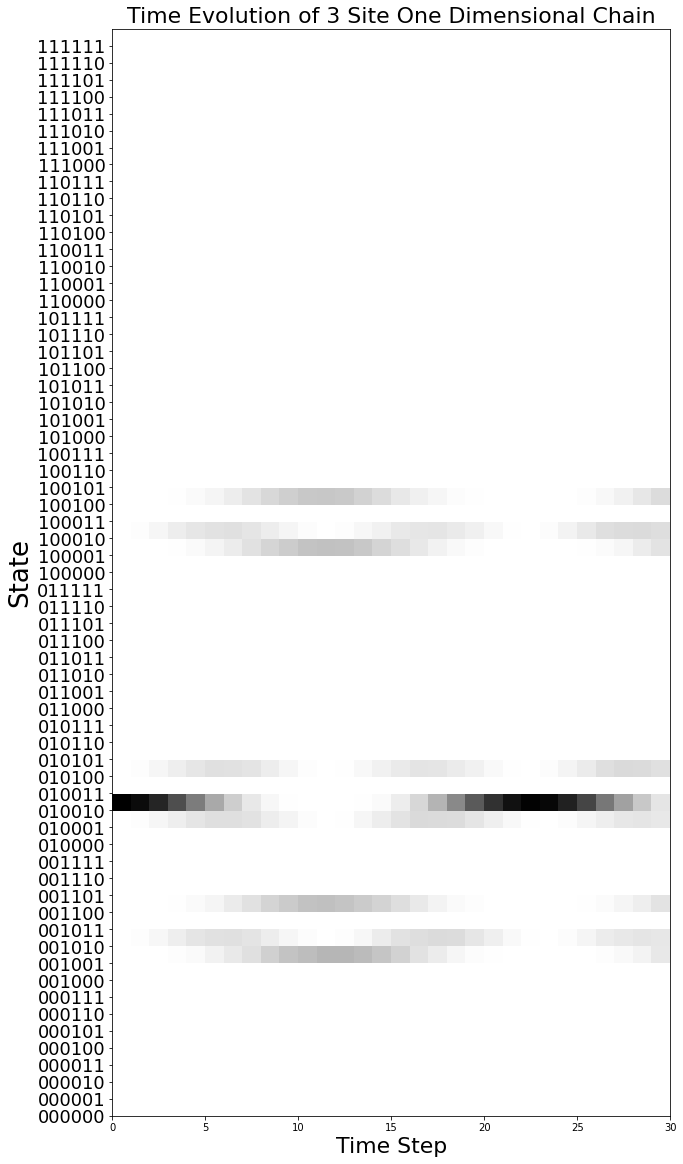

In [69]:
#Attempt to plot data

xticks = np.arange(2**6)
xlabels=[]
print("Time Steps: ",time_steps, " Step Size: ",dt)
for i in range(2**6):
    xlabels.append(get_bin(i,6))
    
fig, ax = plt.subplots(figsize=(10,20))
c = ax.pcolor(data, cmap='binary')
ax.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
plt.yticks(xticks, xlabels, size=18)
ax.set_xlabel('Time Step', fontsize=22)
ax.set_ylabel('State', fontsize=26)
plt.show()

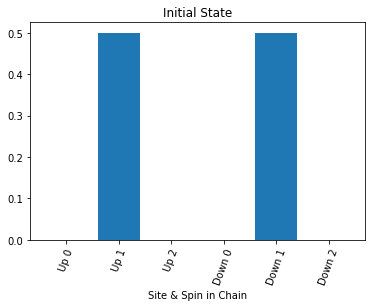

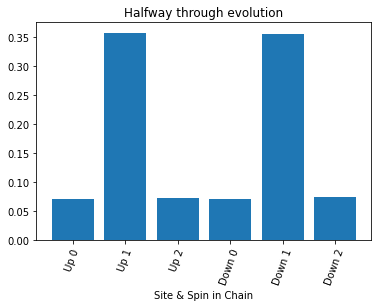

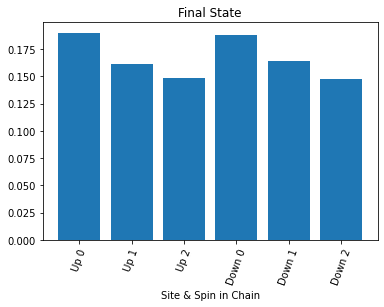

In [6]:
#Attempt visualization scheme that will hopefully be more clear.  Essentially, add up amplitudes 
#from each possible state for a given site and renormalize them.
site_0_up = np.zeros(3)
site_1_up = np.zeros(3)
site_2_up = np.zeros(3)
site_0_dwn = np.zeros(3)
site_1_dwn = np.zeros(3)
site_2_dwn = np.zeros(3)
for i in range(2**6):
    num = get_bin(i, 6)
    if num[0]=='1':
        site_0_up[0] += data[i,0]
        site_0_up[1] += data[i,4]
        site_0_up[2] += data[i,-1]
    if num[1]=='1':
        site_1_up[0] += data[i,0]
        site_1_up[1] += data[i,4]
        site_1_up[2] += data[i,-1]
    if num[2]=='1':
        site_2_up[0] += data[i,0]
        site_2_up[1] += data[i,4]
        site_2_up[2] += data[i,-1]
    if num[3]=='1':
        site_0_dwn[0] += data[i,0]
        site_0_dwn[1] += data[i,4]
        site_0_dwn[2] += data[i,-1]
    if num[4]=='1':
        site_1_dwn[0] += data[i,0]
        site_1_dwn[1] += data[i,4]
        site_1_dwn[2] += data[i,-1]
    if num[5]=='1':
        site_2_dwn[0] += data[i,0]
        site_2_dwn[1] += data[i,4]
        site_2_dwn[2] += data[i,-1]

# t = 0
norm_0 = site_0_up[0] + site_1_up[0] + site_2_up[0] + site_0_dwn[0] + site_1_dwn[0] + site_2_dwn[0]
t0 = [site_0_up[0]/norm_0, site_1_up[0]/norm_0, site_2_up[0]/norm_0, 
     site_0_dwn[0]/norm_0, site_1_dwn[0]/norm_0, site_2_dwn[0]/norm_0]

# t = T/2 (halfway through evolution)
norm_1 = site_0_up[1] + site_1_up[1] + site_2_up[1] + site_0_dwn[1] + site_1_dwn[1] + site_2_dwn[1]
t1 = [site_0_up[1]/norm_1, site_1_up[1]/norm_1, site_2_up[1]/norm_1, 
     site_0_dwn[1]/norm_1, site_1_dwn[1]/norm_1, site_2_dwn[1]/norm_1]

# t = T (end of evolution)
norm_2 = site_0_up[2] + site_1_up[2] + site_2_up[2] + site_0_dwn[2] + site_1_dwn[2] + site_2_dwn[2]
t2 = [site_0_up[2]/norm_2, site_1_up[2]/norm_2, site_2_up[2]/norm_2, 
     site_0_dwn[2]/norm_2, site_1_dwn[2]/norm_2, site_2_dwn[2]/norm_2]


plt.bar([0,1,2,3,4,5], t0)
plt.xticks([0,1,2,3,4,5], ['Up 0', 'Up 1', 'Up 2', 'Down 0', 'Down 1', 'Down 2'],rotation=70)
plt.title("Initial State")
plt.xlabel("Site & Spin in Chain")
plt.show()

plt.bar([0,1,2,3,4,5], t1)
plt.xticks([0,1,2,3,4,5], ['Up 0', 'Up 1', 'Up 2', 'Down 0', 'Down 1', 'Down 2'],rotation=70)
plt.title("Halfway through evolution")
plt.xlabel("Site & Spin in Chain")
plt.show()

plt.bar([0,1,2,3,4,5], t2)
plt.xticks([0,1,2,3,4,5], ['Up 0', 'Up 1', 'Up 2', 'Down 0', 'Down 1', 'Down 2'],rotation=70)
plt.title("Final State")
plt.xlabel("Site & Spin in Chain")
plt.show()


In [19]:
#Create time evolution plot for each of the states
site_0_up = np.zeros(time_steps)
site_1_up = np.zeros(time_steps)
site_2_up = np.zeros(time_steps)
site_0_dwn = np.zeros(time_steps)
site_1_dwn = np.zeros(time_steps)
site_2_dwn = np.zeros(time_steps)
times = np.arange(dt,time_steps*dt+dt, dt)

for t in range(time_steps):
    for i in range(2**6):
        num = get_bin(i, 6)
        if num[0]=='1':
            site_0_up[t] += data[i,t]
        if num[1]=='1':
            site_1_up[t] += data[i,t]
        if num[2]=='1':
            site_2_up[t] += data[i,t]
        if num[3]=='1':
            site_0_dwn[t] += data[i,t]
        if num[4]=='1':
            site_1_dwn[t] += data[i,t]
        if num[5]=='1':
            site_2_dwn[t] += data[i,t]
    norm = site_0_up[t] + site_1_up[t] + site_2_up[t] + site_0_dwn[t] + site_1_dwn[t] + site_2_dwn[t]
    site_0_up[t] = site_0_up[t] / norm
    site_1_up[t] = site_1_up[t] / norm
    site_2_up[t] = site_2_up[t] / norm
    site_0_dwn[t] = site_0_dwn[t] / norm
    site_1_dwn[t] = site_1_dwn[t] / norm
    site_2_dwn[t] = site_2_dwn[t] / norm

30 30 30
[5.00000000e-01 4.88525391e-01 4.61914062e-01 4.13452148e-01
 3.57299805e-01 2.93151855e-01 2.19360352e-01 1.57043457e-01
 8.87451172e-02 4.32128906e-02 1.17797852e-02 4.27246094e-04
 5.92041016e-03 3.40576172e-02 7.46459961e-02 1.32019043e-01
 2.06054688e-01 2.70751953e-01 3.40454102e-01 4.02709961e-01
 4.48120117e-01 4.83764648e-01 4.97192383e-01 4.92614746e-01
 4.66186523e-01 4.24194336e-01 3.63586426e-01 3.03955078e-01
 2.31811523e-01 1.61254883e-01]


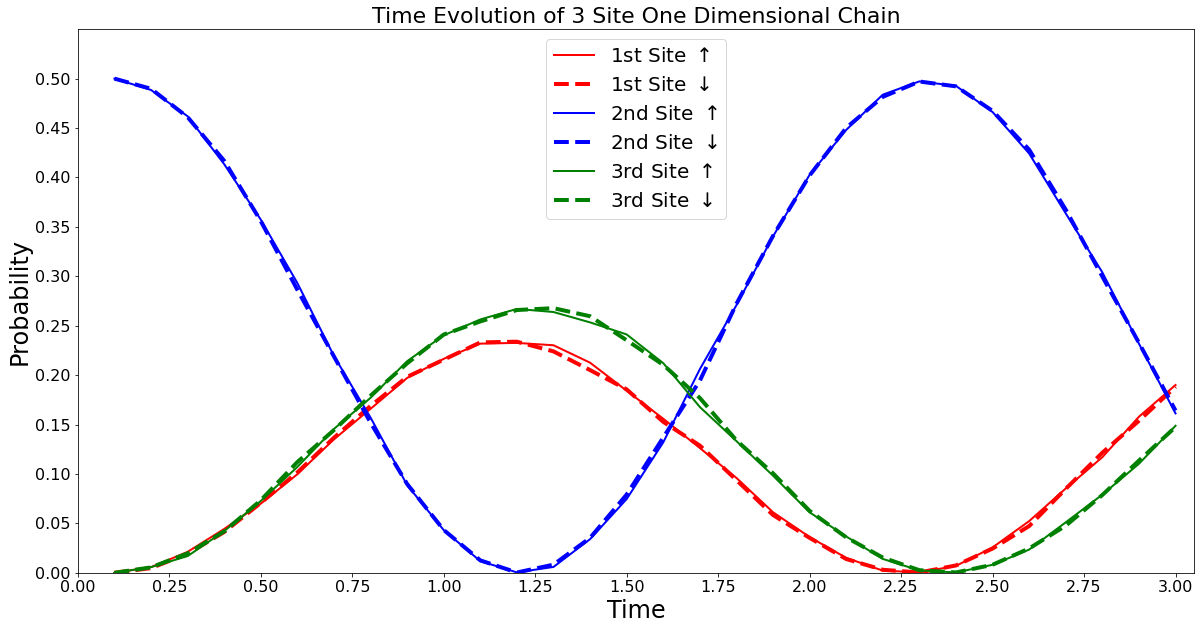

In [59]:
#Plot the processed data
print(len(times), time_steps, len(site_0_up))

fig2, ax2 = plt.subplots(figsize=(20,10))

ax2.plot(times, site_0_up, linestyle='-', color='r', linewidth=2, label=r'1st Site $\uparrow$')
ax2.plot(times, site_0_dwn, linestyle='--', color='r', linewidth=4, label=r'1st Site $\downarrow$')

ax2.plot(times, site_1_up, linestyle='-', color='b', linewidth=2, label=r'2nd Site $\uparrow$')
ax2.plot(times, site_1_dwn, linestyle='--', color='b', linewidth=4, label=r'2nd Site $\downarrow$')

ax2.plot(times, site_2_up, linestyle='-', color='g', linewidth=2, label=r'3rd Site $\uparrow$')
ax2.plot(times, site_2_dwn, linestyle='--', color='g', linewidth=4, label=r'3rd Site $\downarrow$')

ax2.set_ylim(0, 0.55)
ax2.set_xlim(0, time_steps*dt+dt/2.)
ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.25))
ax2.set_yticks(np.arange(0,0.55, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)
#plt.show()
print(site_1_up)

## Draft Codes (Ignore)

In [ ]:
# Set Parameters

dt = 0.1 #Delta t
t = 1.0  #Hopping parameter
U = 2.0  #On-Site repulsion

theta = t*dt/2.
phi = U*dt/4.

#Set up circuit
q = QuantumRegister(6)
c = ClassicalRegister(6)
qc = QuantumCircuit(q,c)

#Initialize circuit by setting the occupation to |010>|010> 
#(i.e. a spin up and down electron in the middle site)
qc.x(1)
qc.x(4)
qc.barrier()
qc.z(0)
qc.draw()

In [ ]:
#Define our time evolution gates

y_hop = Operator([[np.cos(theta), np.sin(theta), 0, 0],
                [-np.sin(theta), np.cos(theta), 0, 0],
                [0, 0, np.cos(theta), np.sin(theta)],
                [0, 0, -np.sin(theta), np.cos(theta)]])
x_hop = Operator([[np.cos(theta), 1j*np.sin(theta), 0, 0],
                 [1j*np.sin(theta), np.cos(theta), 0, 0],
                 [0, 0, np.cos(theta), 1j*np.sin(theta)],
                 [0, 0, 1j*np.sin(theta), np.cos(theta)]])
z_updown = Operator([[np.cos(phi)+1j*np.sin(phi), 0, 0, 0],
                    [0, np.cos(phi)-1j*np.sin(phi), 0, 0],
                    [0, 0, np.cos(phi)+1j*np.sin(phi), 0],
                    [0, 0, 0, np.cos(phi)-1j*np.sin(phi)]])
z_down = Operator([[np.cos(phi)+1j*np.sin(phi), 0, 0, 0],
                  [0, np.cos(phi)+1j*np.sin(phi), 0, 0],
                  [0, 0, np.cos(phi)+1j*np.sin(phi), 0],
                  [0, 0, 0, np.cos(phi)-1j*np.sin(phi)]])
z_up = Operator([[np.cos(phi)+1j*np.sin(phi), 0, 0, 0],
                [0, np.cos(phi)-1j*np.sin(phi), 0, 0],
                [0, 0, np.cos(phi)+1j*np.sin(phi), 0],
                [0, 0, 0, np.cos(phi)+1j*np.sin(phi)]])
z_I = Operator([[np.cos(phi)+1j*np.sin(phi), 0, 0, 0],
               [0, np.cos(phi)+1j*np.sin(phi), 0, 0],
               [0, 0, np.cos(phi)+1j*np.sin(phi), 0],
               [0, 0, 0, np.cos(phi)+1j*np.sin(phi)]])

In [ ]:
#Create single time step circuit

qc.unitary(z_updown,[0,3], label="Z0_updown")
qc.unitary(z_down, [0,3], label="Z0_down")
qc.unitary(z_up, [0,3], label="Z0_up")
qc.unitary(z_I, [0,3], label="Z0_I")

qc.unitary(z_updown,[1,4], label="Z1_updown")
qc.unitary(z_down, [1,4], label="Z1_down")
qc.unitary(z_up, [1,4], label="Z1_up")
qc.unitary(z_I, [1,4], label="Z1_I")

qc.unitary(z_updown,[2,5], label="Z2_updown")
qc.unitary(z_down, [2,5], label="Z2_down")
qc.unitary(z_up, [2,5], label="Z2_up")
qc.unitary(z_I, [2,5], label="Z2_I")

#Hopping terms
qc.unitary(y_hop, [0,1], label="Y01")
qc.unitary(x_hop, [0,1], label="X01")
qc.unitary(y_hop, [2,1], label="Y21")
qc.unitary(x_hop, [2,1], label="X21")

qc.unitary(y_hop, [3,4], label="Y01")
qc.unitary(x_hop, [3,4], label="X01")
qc.unitary(y_hop, [5,4], label="Y21")
qc.unitary(x_hop, [5,4], label="X21")

#Measurement
qc.measure(q, c)
qc.draw()

#Still need to implement measurement and define the above series of gates as a function to be able
# to evolve the system over several time steps.

In [ ]:
'''Use this cell to develop state visualization'''
#Choose provider and backend
provider = IBMQ.get_provider()
backend = Aer.get_backend('statevector_simulator')
#backend = provider.get_backend('ibmq_qasm_simulator')
#backend = provider.get_backend('ibmqx4')
#backend = provider.get_backend('ibmqx2')
#backend = provider.get_backend('ibmq_16_melbourne')

shots = 8192
max_credits = 10 #Max number of credits to spend on execution
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result = job_exp.result()
counts_exp = result.get_counts(qc)
print(result.get_counts(qc))
#plot_histogram(counts_exp)
psi = result.get_statevector(qc)
plot_state_city(psi)


In [ ]:
# Set Parameters

dt = 0.1 #Delta t
t = 1.5  #Hopping parameter
U = 2.0  #On-Site repulsion
q = QuantumRegister(6)
c = ClassicalRegister(6)
qcirc = QuantumCircuit(q,c)

    #Initialize circuit by setting the occupation to |010>|010> 
    #(i.e. a spin up and down electron in the middle site)
qcirc.x(1)
qcirc.x(0)
qcirc.x(4)
qcirc.x(5)
qcirc.draw()
qc_evolve(qcirc, dt, t, U, 10)

#Measurement
qcirc.measure(q, c)
qcirc.draw()

In [ ]:
#Choose provider and backend
provider = IBMQ.get_provider()
#backend = Aer.get_backend('statevector_simulator')
backend = provider.get_backend('ibmq_qasm_simulator')
#backend = provider.get_backend('ibmqx4')
#backend = provider.get_backend('ibmqx2')
#backend = provider.get_backend('ibmq_16_melbourne')

shots = 8192
max_credits = 10 #Max number of credits to spend on execution
job_exp = execute(qcirc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result = job_exp.result()
counts_exp = result.get_counts(qcirc)
print(result.get_counts(qcirc))
plot_histogram(counts_exp)
#psi = result.get_statevector(qcirc)
#plot_state_city(psi)

In [ ]:
#Mess around with operators

a = 1 - 1
b = 1 - -1
m1 = np.matrix([[0,0],[0,-2]])
m2 = np.kron(m1,m1)
m2 = np.matrix([[1-1,0],[0,-1-1]])
print('m1 is: ',m1)
print("m2 is: ", m2)
print("Check if unitary \n",m2.dot(m2.conj().T))